In [61]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import os
from time import time
from time import sleep


In [65]:
def api_run():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'100',
        'convert':'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': 'f9465d0f-0a6c-4e4a-8c4b-9ab868171b7e',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
    

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    if not os.path.isfile(r'D:\Study\profolio\automating_crypto\Api3.csv'):
        df.to_csv(r'D:\Study\profolio\automating_crypto\Api3.csv', header = 'column_names')
    else:
         df.to_csv(r'D:\Study\profolio\automating_crypto\Api3.csv', mode = 'a', header = False)
    

In [66]:
for i in range(300):
    api_run()
    print('api run completed')
    sleep(60)
exit()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14328\191735616.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


api run completed


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14328\191735616.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


api run completed


In [11]:

file_name = "D:\\Study\\profolio\\automating_crypto\\Api3.csv"

In [13]:
df = pd.read_csv(file_name)
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9767,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.917506e+07,...,39.5604,4.056503e+11,NaN,2022-10-10T11:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-10 11:15:03.264877
1,1,1027,Ethereum,ETH,ethereum,6131,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.227331e+08,...,17.2070,1.610993e+11,NaN,2022-10-10T11:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-10 11:15:03.264877
2,2,825,Tether,USDT,tether,40631,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,6.837186e+10,...,7.3033,7.015458e+10,NaN,2022-10-10T11:12:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-10 11:15:03.264877
3,3,3408,USD Coin,USDC,usd-coin,6466,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.605440e+10,...,4.9223,4.605922e+10,NaN,2022-10-10T11:12:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-10 11:15:03.264877
4,4,1839,BNB,BNB,bnb,1123,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.0,1.613373e+08,...,4.7387,5.496709e+10,NaN,2022-10-10T11:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-10 11:15:03.264877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,95,5034,Kusama,KSM,kusama,150,2019-12-12T00:00:00.000Z,"['substrate', 'polkadot-ecosystem', 'cms-holdi...",NaN,8.470098e+06,...,0.0387,4.125881e+08,NaN,2022-10-10T11:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-10 11:16:04.610289
196,96,2083,Bitcoin Gold,BTG,bitcoin-gold,67,2017-10-23T00:00:00.000Z,"['mineable', 'medium-of-exchange', 'payments']",21000000.0,1.751392e+07,...,0.0384,4.312172e+08,NaN,2022-10-10T11:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-10 11:16:04.610289
197,97,13855,Ethereum Name Service,ENS,ethereum-name-service,135,2021-11-09T01:31:29.000Z,"['dao', 'governance', 'web3']",100000000.0,2.024486e+07,...,0.0378,1.745960e+09,NaN,2022-10-10T11:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xC18360217D8F7Ab5e7c516566761Ea12Ce7F9D72,2022-10-10 11:16:04.610289
198,98,8104,1inch Network,1INCH,1inch,274,2020-12-25T00:00:00.000Z,"['decentralized-exchange', 'defi', 'amm', 'bin...",NaN,5.838696e+08,...,0.0373,8.970102e+08,NaN,2022-10-10T11:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0x111111111117dc0aa78b770fa6a738034120c302,2022-10-10 11:16:04.610289


In [16]:
pd.set_option('display.float_format', lambda x: '%.5f'%x)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          200 non-null    int64  
 1   id                                  200 non-null    int64  
 2   name                                200 non-null    object 
 3   symbol                              200 non-null    object 
 4   slug                                200 non-null    object 
 5   num_market_pairs                    200 non-null    int64  
 6   date_added                          200 non-null    object 
 7   tags                                200 non-null    object 
 8   max_supply                          120 non-null    float64
 9   circulating_supply                  200 non-null    float64
 10  total_supply                        200 non-null    float64
 11  platform                            0 non-nul

In [19]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

In [20]:
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.06007,-0.99155,0.45160,-9.51084,-21.18901,-1.77306
Ethereum,0.01388,-0.84907,1.18754,-23.91824,-30.51885,23.80685
Tether,-0.00060,0.00423,0.00704,-0.02493,-0.02691,0.08781
USD Coin,0.01030,-0.00272,0.00396,0.02033,0.01593,-0.01214
BNB,0.00572,-1.27476,-3.78803,-6.59815,-16.61532,23.46222
...,...,...,...,...,...,...
Kusama,-0.14777,0.12619,3.06874,-17.65463,-32.29483,-8.50270
Bitcoin Gold,0.13859,-6.14086,2.66009,-21.38624,-29.98796,37.34043
Ethereum Name Service,-0.71211,-0.85115,17.81435,11.29888,7.65595,106.81499


In [22]:
df4 = df3.stack()
df4

name                                 
Bitcoin  quote.USD.percent_change_1h     -0.06007
         quote.USD.percent_change_24h    -0.99155
         quote.USD.percent_change_7d      0.45160
         quote.USD.percent_change_30d    -9.51084
         quote.USD.percent_change_60d   -21.18901
                                           ...   
Holo     quote.USD.percent_change_24h    -0.64881
         quote.USD.percent_change_7d     -0.09992
         quote.USD.percent_change_30d    -8.22851
         quote.USD.percent_change_60d   -23.67703
         quote.USD.percent_change_90d     3.01591
Length: 600, dtype: float64

In [23]:
type(df4)

pandas.core.series.Series

In [26]:
df4.count()

600

In [30]:
df5 = df4.to_frame(name = 'values')

In [31]:
df5

values
name                                          
Bitcoin quote.USD.percent_change_1h   -0.06007
        quote.USD.percent_change_24h  -0.99155
        quote.USD.percent_change_7d    0.45160
        quote.USD.percent_change_30d  -9.51084
        quote.USD.percent_change_60d -21.18901
...                                        ...
Holo    quote.USD.percent_change_24h  -0.64881
        quote.USD.percent_change_7d   -0.09992
        quote.USD.percent_change_30d  -8.22851
        quote.USD.percent_change_60d -23.67703
        quote.USD.percent_change_90d   3.01591

[600 rows x 1 columns]

In [35]:
index = pd.Index(range(600))
df6 = df5.reset_index()

In [36]:
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.06007
1,Bitcoin,quote.USD.percent_change_24h,-0.99155
2,Bitcoin,quote.USD.percent_change_7d,0.45160
3,Bitcoin,quote.USD.percent_change_30d,-9.51084
4,Bitcoin,quote.USD.percent_change_60d,-21.18901
...,...,...,...
595,Holo,quote.USD.percent_change_24h,-0.64881
596,Holo,quote.USD.percent_change_7d,-0.09992
597,Holo,quote.USD.percent_change_30d,-8.22851
598,Holo,quote.USD.percent_change_60d,-23.67703


In [37]:
df6.rename(columns={'level_1':'percent_change_time'}, inplace=True)

In [38]:
df6

,name,percent_change_time,values
0,Bitcoin,quote.USD.percent_change_1h,-0.06007
1,Bitcoin,quote.USD.percent_change_24h,-0.99155
2,Bitcoin,quote.USD.percent_change_7d,0.45160
3,Bitcoin,quote.USD.percent_change_30d,-9.51084
4,Bitcoin,quote.USD.percent_change_60d,-21.18901
...,...,...,...
595,Holo,quote.USD.percent_change_24h,-0.64881
596,Holo,quote.USD.percent_change_7d,-0.09992
597,Holo,quote.USD.percent_change_30d,-8.22851
598,Holo,quote.USD.percent_change_60d,-23.67703


In [44]:
df6['percent_change_time'] = df6['percent_change_time'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

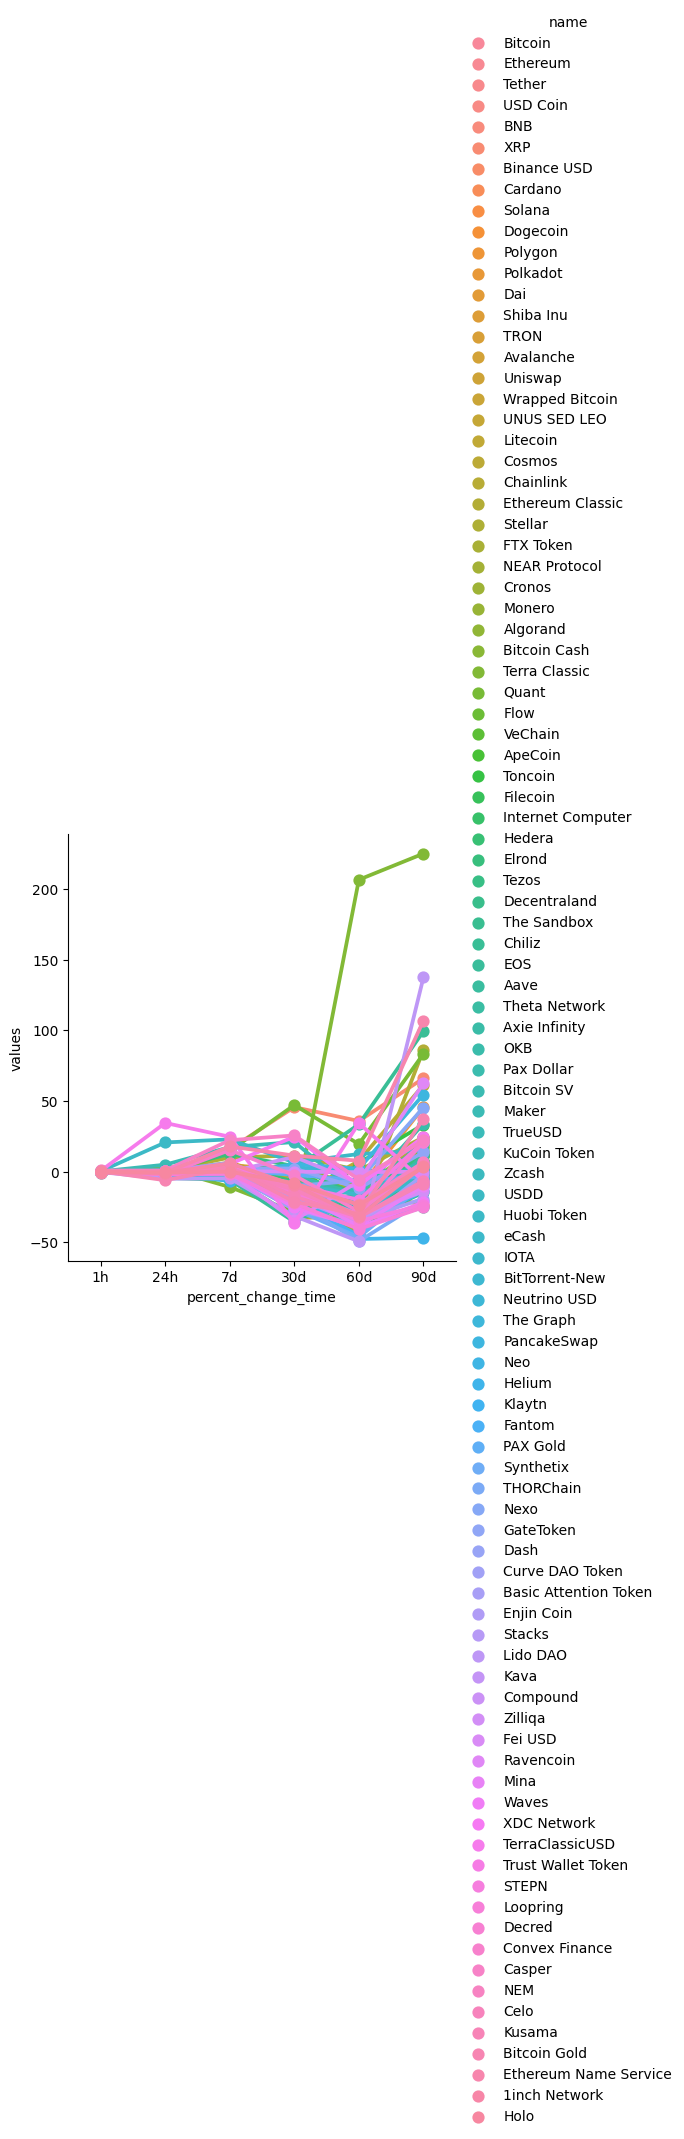

In [46]:

sns.catplot(x = 'percent_change_time', y = 'values', hue = 'name', kind = 'point',data = df6)

In [52]:
df_currency = df[['name', 'quote.USD.price','timestamp']]

In [59]:
df_btc = df_currency.query("name == 'Ethereum'")
df_btc

,name,quote.USD.price,timestamp
1,Ethereum,1312.59851,2022-10-10 11:15:03.264877
101,Ethereum,1312.78755,2022-10-10 11:16:04.610289


<AxesSubplot: xlabel='timestamp', ylabel='quote.USD.price'>

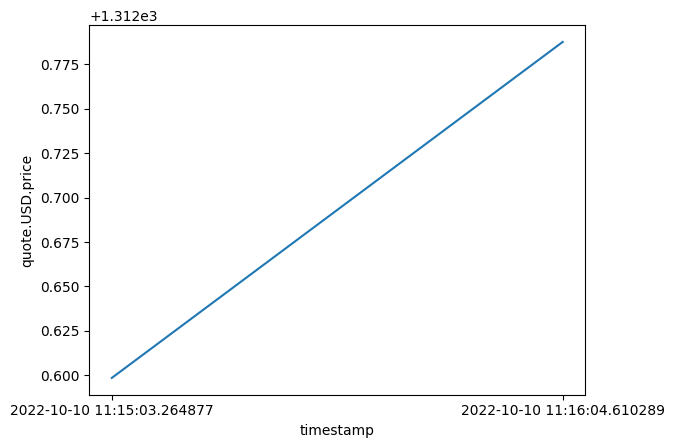

In [60]:
sns.lineplot(data=df_btc, x="timestamp", y="quote.USD.price")